# Orlando - Classificação Multiclasse - Iris Cruzada

c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\ke

 Acurácias por fold: [1.     0.9333 1.     0.6667 0.9333 0.9333 1.     1.     1.     1.    ]
 Acurácia média: 0.9467
 Desvio padrão: 0.0980


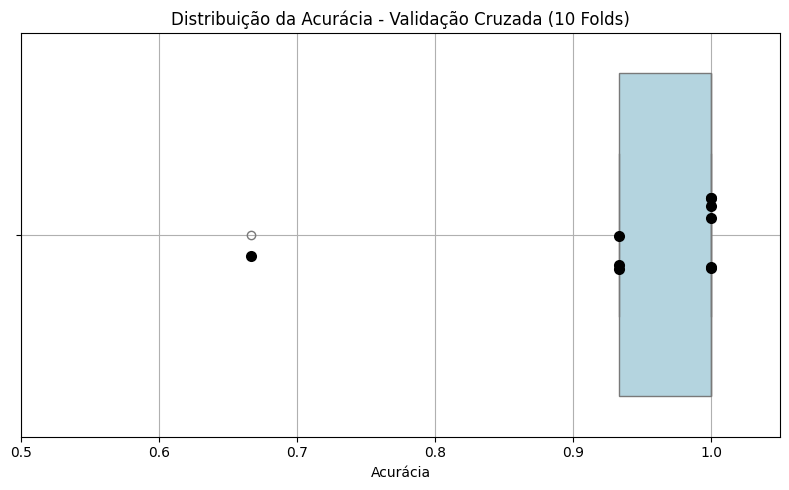

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras import backend as K

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from scikeras.wrappers import KerasClassifier

# ---------------------------------------
# 2. Carregamento da base de dados
# ---------------------------------------
base = pd.read_csv(r"C:\Users\CLIENTE\OneDrive\PROJETOS\PROJETO_DEEP_LEARNING\Parte 1 - Redes Neurais Artificiais\classificação mais classes\iris.csv")

# Separando variáveis preditoras (X) e classe (y)
X = base.iloc[:, 0:4].values
y = base.iloc[:, 4].values

# Convertendo classes de texto para inteiros (0, 1, 2)
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

# ---------------------------------------
# 3. Definição da arquitetura da rede
# ---------------------------------------
def criar_rede():
    K.clear_session()  # Limpa sessões anteriores do backend
    model = Sequential()
    model.add(InputLayer(input_shape=(4,)))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(3, activation='softmax'))  # 3 classes -> saída softmax
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',  # Usa sparse pois y está em inteiros
                  metrics=['accuracy'])
    return model

# ---------------------------------------
# 4. Empacotando com Scikeras
# ---------------------------------------
rede_neural = KerasClassifier(
    model=criar_rede,
    epochs=250,
    batch_size=10,
    verbose=0
)

# ---------------------------------------
# 5. Validação cruzada com 10 folds
# ---------------------------------------
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

resultados = cross_val_score(estimator=rede_neural,
                             X=X,
                             y=y,
                             cv=kfold,
                             scoring='accuracy')

# ---------------------------------------
# 6. Exibição dos resultados
# ---------------------------------------
print(" Acurácias por fold:", np.round(resultados, 4))
print(f" Acurácia média: {resultados.mean():.4f}")
print(f" Desvio padrão: {resultados.std():.4f}")

# ---------------------------------------
# 7. Visualização da acurácia por fold
# ---------------------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(data=resultados, orient='h', color='lightblue')
sns.stripplot(data=resultados, orient='h', color='black', size=8, jitter=0.1)
plt.title("Distribuição da Acurácia - Validação Cruzada (10 Folds)")
plt.xlabel("Acurácia")
plt.xlim(0.5, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()


### Considerações:

Os resultados apresentados por meio da validação cruzada com 10 folds mostram um desempenho notavelmente elevado da rede neural artificial (RNA) aplicada à base de dados Íris, com acurácia média de aproximadamente 94,67% e baixo desvio padrão de 0,0980, indicando não apenas precisão, mas também estabilidade do modelo nas diferentes partições dos dados.

A distribuição das acurácias evidencia que a maioria dos folds obteve acurácia igual a 100%, com exceção de um outlier que atingiu 66,67%, indicando que em uma das subdivisões o modelo teve maior dificuldade para generalizar corretamente. Isso pode ter ocorrido por variações na representatividade das amostras de cada classe dentro desse fold em específico, o que é comum em bases pequenas como a Íris, composta por apenas 150 amostras divididas entre três classes.

O boxplot apresentado reforça a consistência geral da rede, com os valores distribuídos majoritariamente próximos do valor máximo (1.0). A presença de poucos valores abaixo de 90% e de um único outlier sugere que a arquitetura atual é eficaz, mas também sensível à variação entre os folds — um indicativo de que, embora robusta, a rede pode se beneficiar de estratégias adicionais de regularização, aumento de dados (data augmentation) ou validação estratificada com múltiplas repetições para suavizar essas discrepâncias.

A arquitetura empregada (duas camadas ocultas com 4 neurônios e ativação ReLU, seguido de uma camada softmax) mostrou-se adequada para a separabilidade natural da base Íris, que é conhecida por ter divisões bem definidas, especialmente entre a classe Iris-setosa e as demais. No entanto, a queda pontual na acurácia em um dos folds alerta para a possibilidade de confusão entre as classes versicolor e virginica — historicamente as mais difíceis de distinguir nessa base.

Em síntese, os resultados sugerem que a RNA construída possui elevado poder preditivo e generalização eficiente, sendo capaz de lidar com o problema multiclasse com baixo viés e variância controlada. Contudo, o comportamento atípico observado em um dos folds recomenda uma investigação complementar da composição desse subconjunto, além da eventual aplicação de métodos de robustez estatística ou validação repetida para consolidação das métricas apresentadas.








